# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)


%matplotlib inline

## Datasets.
- 1. notification dataset.  
![Notification](images/trigger_data.jpg "Notification")
- 2. user log dataset. 
![User Log](images/user_log_data.jpg "User Log")
- 3. user data.
![User Data](images/user_data.jpg "User details")

![Delivery Types](images/lpdeliveryTypes.jpg "Delivery Types")
![Comparison Graph](images/lpDgraph.jpg "Comparision")
![Flow](images/lpFlow.jpg "Flow")
<br><br>
Participants were randomised post-baseline to one of three versions of Healthy Mind: intelligent, daily, or occasional. Intelligent notifications were triggered at times when the algorithm predicted that a user was most likely to notice and respond. Opportune times for each user were identified by sampling data from three phone-based sensors: location (GPS), movement (accelerometer), and time of day (clock). The first two notifications were triggered at random, but within designated time and frequency parameters. The timing and frequency of notification triggering was then refined after every notification, that is, the app learned when and in what contexts notifications were responded to most often. Specifically users could receive up to 3 notifications per day between 08.00 and 22.00 hours. **Users could customise the time range within which notifications were received. Following this learning period, a model of interruptibility was then built for each user using a Naïve Bayesian classifier that established a relationship between specific contexts and likelihood of notification response. Once the model was trained, the user’s context was sampled every 20 minutes to anticipate the likelihood of notification response.**

The classifier utilised location (GPS), movement (accelerometer) and time variables that were derived from the raw sensor readings. Initially, users’ sampled GPS co-ordinates were clustered and averaged within particular time-frames to infer “home” (01.00 to 06.00 hours), “work” (10.00–16.00 hours), and “other” locations. GPS co-ordinates within a 500m radius of “home” or “work” co-ordinates were then labelled as “home” or “work”. Co-ordinates outside of this radius were labelled “other”. Accelerometer X, Y, and Z values were collected for 60s within each 20 minute sampling window. In line with previous activity recognition research, the mean intensity of acceleration, the variance of acceleration and the mean crossing rate were then calculated from the raw accelerometer values to provide a proxy measure of movement [29]. Time variables were hour of day and weekend versus weekday.

A notification was only triggered if a yes label was returned (i.e. notification response was deemed likely). The relative weighting of each sensed variable within the classifier varied between users. That is, the model of interruptibility was personalised to each individual user. A Naïve Bayesian classifier assumed that variables within each personalised model were unrelated. This means that the relative weighting of each sensed variable did not vary with respect to other variables in the model. For example, the importance placed on a user’s motion within the classifier remained the same regardless of whether the user was designated to be at home, work or other location. The sensing, data processing, and generation of interruptibility models were handled by independent open-source Android libraries

**Implication**

The results from this study suggest that, in naturalistic settings, tailoring notification delivery to location, movement, and time of day may not always offer any advantage over a priori assumptions about convenient moments. Smartphones offer a wide range of contextual data that were not utilised in the current study. It may be that alternative combinations of sensor data will enhance response rates and intervention usage. The results from this study also suggest that sending frequent, daily notifications may not deter users from engaging with an app-based intervention and could mean that they are exposed to more of the intervention content. However, precise thresholds for the frequency at which notifications deter or encourage intervention usage are not yet known. For example, it may be that while daily notifications are acceptable, several notifications per day may be unacceptable. Similarly, too many intelligent, sensor-driven notifications may be perceived by users as random. Optimal thresholds may also vary for different population sub-groups and health behaviours. Larger scale studies are needed to test the hypotheses generated from this study and to examine the impact of other combinations of sensor data and different notification delivery schedules.

Current approaches to measuring intervention engagement typically rely on objectively recorded usage data, which may underestimate engagement with the intervention content. It may be that initial notification receipt or observed app usage provided reminders to practice relevant tools at a later time. Subsequent practice of the tool will not be reflected in the observed usage patterns. Identifying variables that indicate optimal receptivity to intervention content is an ongoing challenge for the development of just-in-time adaptive interventions [43]. Nested qualitative studies can provide more in-depth insight of participants’ experiences following the intervention and their potential reasons for continued engagement or disengagement [33]. Adoption of a mixed-methods approach to evaluating digital interventions can support more informed and appropriate conceptualisations about what constitutes poor versus successful engagement and the factors that underlie whether and when an individual stops using an intervention. Additional work is needed to identify and evaluate novel methods for assessing engagement with digital interventions that can capture off-line activities and experiences.

## Overview of the dataset.
> The provided dataset contains data relating to just when the user reacted to notification (send and response times)
and which group they belong. Based on this various features were tried to extract which are represented below.
>
We combined the **3 csv** files provied to make the final dataset for initial analysis.


In [2]:
noti = pd.read_csv('noti_data.csv')          # 1
user_data = pd.read_csv('user_data.csv')     # 3
user_log = pd.read_csv('user_log_data.csv')  # 2

### Notification data.

In [3]:
noti.head(3)

,id,trigger number,notification time,was followed,followed time,delay
0,1,1,13-10-14 12:19:24,1.0,13-10-2014 12:32,803
1,1,2,13-10-14 18:04:42,1.0,13-10-2014 18:44,2401
2,1,3,14-10-14 11:12:25,NaN,NaN,0


### User details

In [4]:
user_data.head(3)

,id,signup time,Group,age,gender,qual
0,1,13-10-2014 09:39,1.0,48.0,Female,Degree
1,3,07-10-2014 22:07,3.0,42.0,Male,GCSEs / O levels or similar
2,4,04-09-2014 09:53,3.0,15.0,Male,Degree


### Notification Logs

In [5]:
user_log.head(3)

,id,activity id,page,activity type,status,time,status.1,time.1,seconds on page,session number,time since last log
0,1,Healthy Mind: Basline Consent,Healthy Mind: Basline Consent,info,start,13-10-14 10:37:14.858,NaN,NaN,0,1,0.00
1,1,Healthy Mind: Basline Consent,Healthy Mind: Basline Consent,info,start,13-10-14 10:37:15.094,complete,13-10-14 10:37:48.662,33,1,0.24
2,1,baselineSurvey,Healthy Mind: Basline Questionnaire,survey,start,13-10-14 10:37:48.773,complete,13-10-14 10:39:18.532,90,1,0.11


### Combined

In [3]:
dummy = pd.read_csv('dummy.csv',index_col=0)
dummy.head()

,id,trigger number,was followed,delay,e,n_date,n_hour,n_day,f_date,f_hour,f_day,group,send_time,viewed_time,age,gender,qual
0,1,1,1.0,803,1,2014-10-13,12,Mon,2014-10-13,12,Mon,Intelligent,12:19:24,12:32:00,48.0,Female,Degree
1,1,2,1.0,2401,1,2014-10-13,18,Mon,2014-10-13,18,Mon,Intelligent,18:04:42,18:44:00,48.0,Female,Degree
2,1,3,0.0,0,1,2014-10-14,11,Tue,1970-01-01,0,Thu,Intelligent,11:12:25,0,48.0,Female,Degree
3,3,1,1.0,9852,1,2014-08-10,20,Sun,2014-08-10,23,Sun,Occasional,20:16:28,23:00:00,42.0,Male,GCSEs / O levels or similar
4,3,2,0.0,0,1,2014-11-10,20,Mon,1970-01-01,0,Thu,Occasional,20:09:49,0,42.0,Male,GCSEs / O levels or similar


In [7]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5313 entries, 0 to 5436
Data columns (total 17 columns):
id                5313 non-null object
trigger number    5313 non-null int64
was followed      5313 non-null float64
delay             5313 non-null int64
e                 5313 non-null int64
n_date            5313 non-null object
n_hour            5313 non-null int64
n_day             5313 non-null object
f_date            5313 non-null object
f_hour            5313 non-null int64
f_day             5313 non-null object
group             5313 non-null object
send_time         5313 non-null object
viewed_time       5313 non-null object
age               5313 non-null float64
gender            5313 non-null object
qual              5313 non-null object
dtypes: float64(2), int64(5), object(10)
memory usage: 747.1+ KB


**Various people in different experiment group**

In [8]:
# $#!| we are dealing with
print('Number of samples in each class.\n')
print('===================================')
print(dummy['was followed'].value_counts())
print('===================================')

print('\nDetailed')
print('*-*-*-*-**-*-*-*-**-*-*-*-**-*-*-*-*')
c1 = dummy['group'] == 'Intelligent'
c2 = dummy['group'] == 'Daily'
c3 = dummy['group'] == 'Occasional'

print('Intelligent : \n{}\n'.format(dummy[c1]['was followed'].value_counts()))
print('===================================')

print('Daily : \n{}\n'.format(dummy[c2]['was followed'].value_counts()))
print('===================================')

print('Occasional : \n{}\n'.format(dummy[c3]['was followed'].value_counts()))
print('===================================')

dummy['group'].value_counts()
dummy['group'].value_counts()

Number of samples in each class.

0.0    4531
1.0     782
Name: was followed, dtype: int64

Detailed
*-*-*-*-**-*-*-*-**-*-*-*-**-*-*-*-*
Intelligent : 
0.0    1114
1.0     216
Name: was followed, dtype: int64

Daily : 
0.0    2323
1.0     335
Name: was followed, dtype: int64

Occasional : 
0.0    927
1.0    204
Name: was followed, dtype: int64



Daily          2658
Intelligent    1330
Occasional     1131
0               194
Name: group, dtype: int64

Below dataframe shows only the columns in which we are interested.<br>
**Not to mention we have used various other parameters to decide the likeliness of notification being clicked based on device sensors**

In [9]:
d = dummy[['id','n_date','f_date','group','send_time','viewed_time','was followed','delay']]

d.head()

,id,n_date,f_date,group,send_time,viewed_time,was followed,delay
0,1,2014-10-13,2014-10-13,Intelligent,12:19:24,12:32:00,1.0,803
1,1,2014-10-13,2014-10-13,Intelligent,18:04:42,18:44:00,1.0,2401
2,1,2014-10-14,1970-01-01,Intelligent,11:12:25,0,0.0,0
3,3,2014-08-10,2014-08-10,Occasional,20:16:28,23:00:00,1.0,9852
4,3,2014-11-10,1970-01-01,Occasional,20:09:49,0,0.0,0


## Visualizations 📈📊

F:\TBINSTALLS\conda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
F:\TBINSTALLS\conda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
F:\TBINSTALLS\conda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


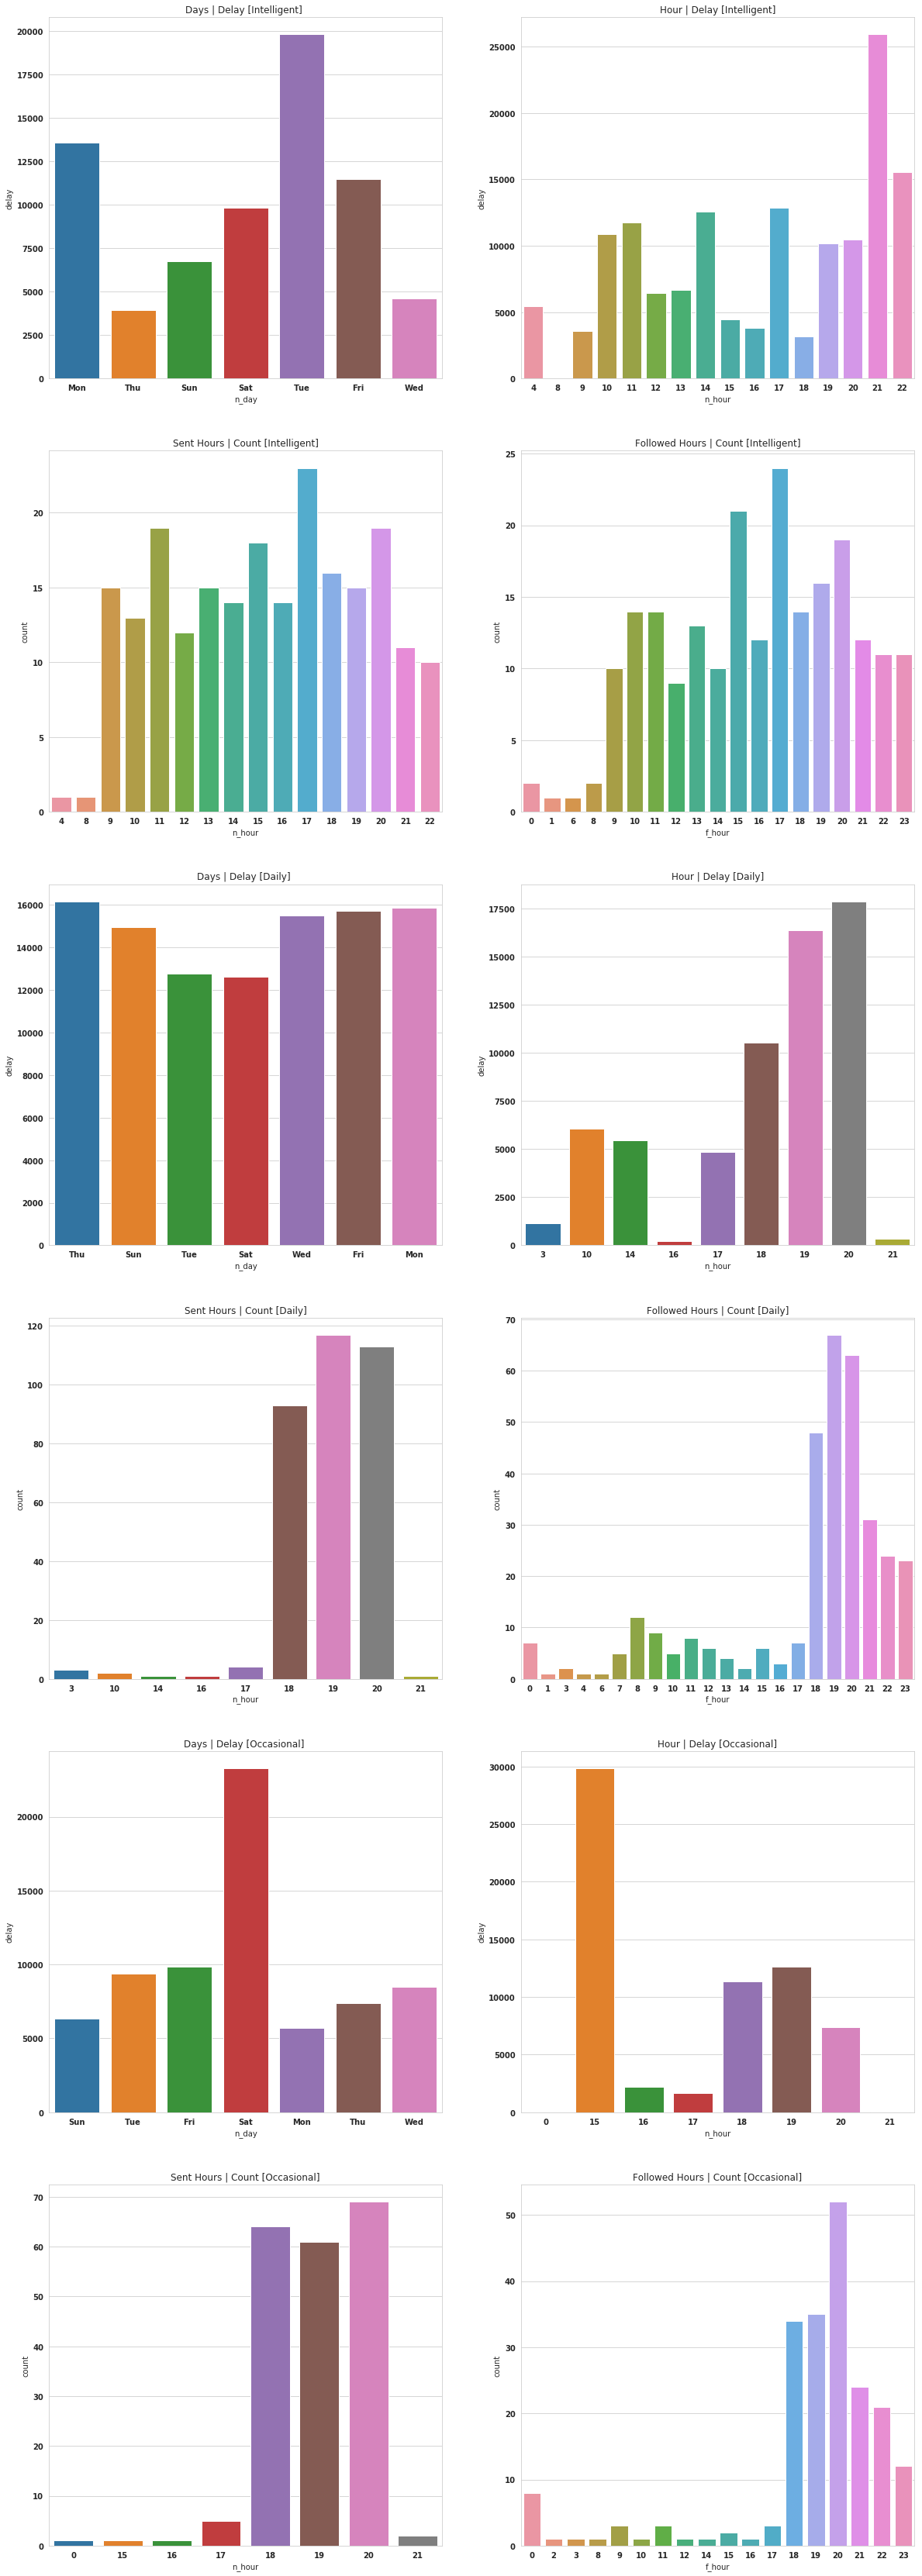

In [4]:
fig, axs = plt.subplots(ncols=2, nrows = 6, figsize = (20,60))
plt.tight_layout
# Masks

c = dummy['was followed'] == 1.0
c1 = dummy['group'] == 'Intelligent'
c2 = dummy['group'] == 'Daily'
c3 = dummy['group'] == 'Occasional'

############# RULE 1 ############################
sns.barplot(x = 'n_day', y = 'delay', data = dummy[c & c1] , ci = None, ax = axs[0][0])
axs[0][0].title.set_text('Days | Delay [Intelligent] ')
sns.barplot(x = 'n_hour', y = 'delay', data = dummy[c & c1] , ci = None, ax = axs[0][1])
axs[0][1].title.set_text('Hour | Delay [Intelligent]')

sns.countplot(x = 'n_hour', data = dummy[c & c1], ax = axs[1][0])
axs[1][0].title.set_text('Sent Hours | Count [Intelligent]')
sns.countplot(x = 'f_hour', data = dummy[c & c1], ax = axs[1][1])
axs[1][1].title.set_text('Followed Hours | Count [Intelligent]')

############# RULE 2 ############################

sns.barplot(x = 'n_day', y = 'delay', data = dummy[c & c2] , ci = None, ax = axs[2][0])
axs[2][0].title.set_text('Days | Delay [Daily] ')
sns.barplot(x = 'n_hour', y = 'delay', data = dummy[c & c2] , ci = None, ax = axs[2][1])
axs[2][1].title.set_text('Hour | Delay [Daily]')

sns.countplot(x = 'n_hour', data = dummy[c & c2], ax = axs[3][0])
axs[3][0].title.set_text('Sent Hours | Count [Daily]')
sns.countplot(x = 'f_hour', data = dummy[c & c2], ax = axs[3][1])
axs[3][1].title.set_text('Followed Hours | Count [Daily]')

############# RULE 3 ############################

sns.barplot(x = 'n_day', y = 'delay', data = dummy[c & c3] , ci = None, ax = axs[4][0])
axs[4][0].title.set_text('Days | Delay [Occasional] ')
sns.barplot(x = 'n_hour', y = 'delay', data = dummy[c & c3] , ci = None, ax = axs[4][1])
axs[4][1].title.set_text('Hour | Delay [Occasional]')

sns.countplot(x = 'n_hour', data = dummy[c & c3], ax = axs[5][0])
axs[5][0].title.set_text('Sent Hours | Count [Occasional]')
sns.countplot(x = 'f_hour', data = dummy[c & c3], ax = axs[5][1])
axs[5][1].title.set_text('Followed Hours | Count [Occasional]')

#################################################



### Distribution Plots
> Distribution plot of user behaviour across different experiment group.

F:\TBINSTALLS\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


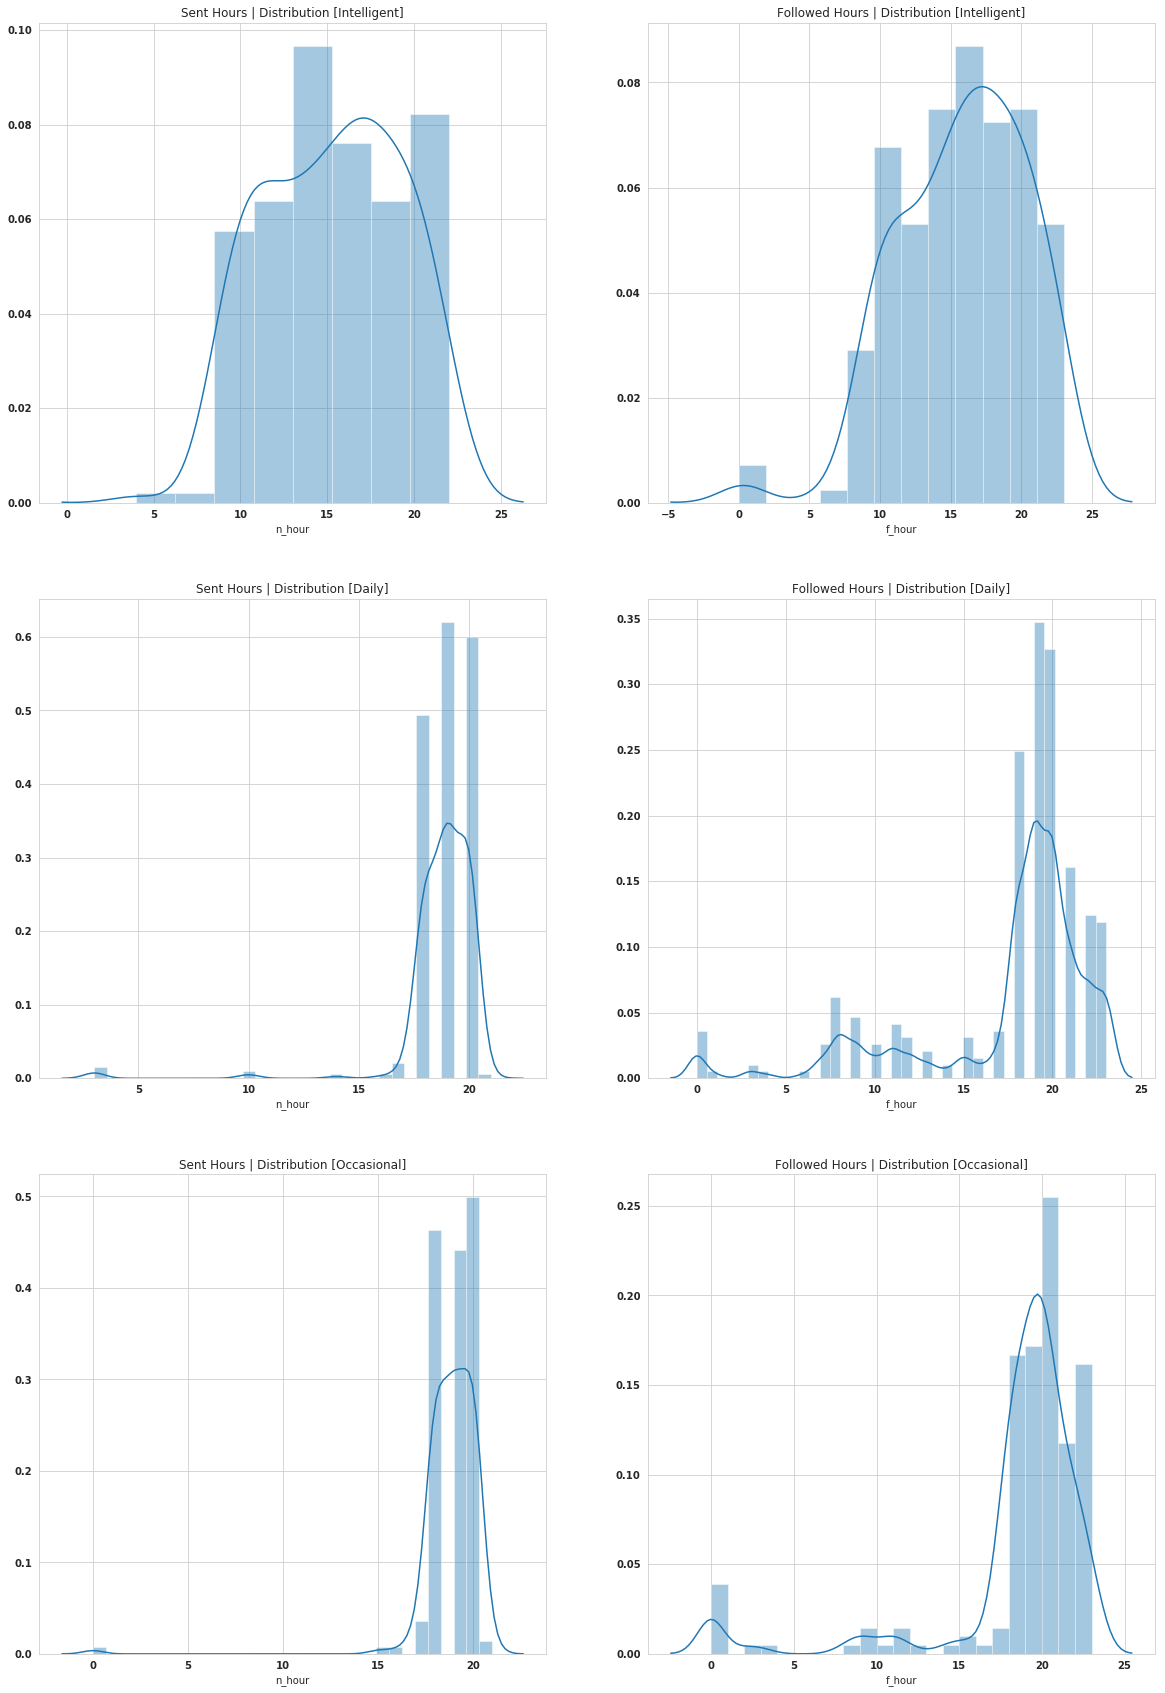

In [11]:
## For Distributions
fig, axs = plt.subplots(ncols=2, nrows = 3, figsize = (20,30))
plt.tight_layout
######## Intelligent ########
sns.distplot(dummy[c & c1]['n_hour'], ax = axs[0][0])
axs[0][0].title.set_text('Sent Hours | Distribution [Intelligent]')
sns.distplot(dummy[c & c1]['f_hour'], ax = axs[0][1])
axs[0][1].title.set_text('Followed Hours | Distribution [Intelligent]')
######## Daily ########
sns.distplot(dummy[c & c2]['n_hour'], ax = axs[1][0])
axs[1][0].title.set_text('Sent Hours | Distribution [Daily]')
sns.distplot(dummy[c & c2]['f_hour'], ax = axs[1][1])
axs[1][1].title.set_text('Followed Hours | Distribution [Daily]')
######## Occasional ########
sns.distplot(dummy[c & c3]['n_hour'], ax = axs[2][0])
axs[2][0].title.set_text('Sent Hours | Distribution [Occasional]')
sns.distplot(dummy[c & c3]['f_hour'], ax = axs[2][1])
axs[2][1].title.set_text('Followed Hours | Distribution [Occasional]')



## Making group of dataset based on Acceptance, Group

In [5]:
grp_f_dummy = dummy[c].groupby(['f_hour','group'])['e'].sum().unstack().fillna(0).reset_index().drop(labels = '0', axis = 1)
grp_n_dummy = dummy[c].groupby(['n_hour','group'])['e'].sum().unstack().fillna(0).reset_index().drop(labels = '0', axis = 1)


In [6]:
grp_f_dummy.head()

group,f_hour,Daily,Intelligent,Occasional
0,0,7.0,2.0,8.0
1,1,1.0,1.0,0.0
2,2,0.0,0.0,1.0
3,3,2.0,0.0,1.0
4,4,1.0,0.0,0.0


In [7]:
grp_n_dummy.head()

group,n_hour,Daily,Intelligent,Occasional
0,0,0.0,0.0,1.0
1,3,3.0,0.0,0.0
2,4,0.0,1.0,0.0
3,8,0.0,1.0,0.0
4,9,0.0,15.0,0.0


Text(0, 0.5, ' No. of Notifications ')

F:\TBINSTALLS\conda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


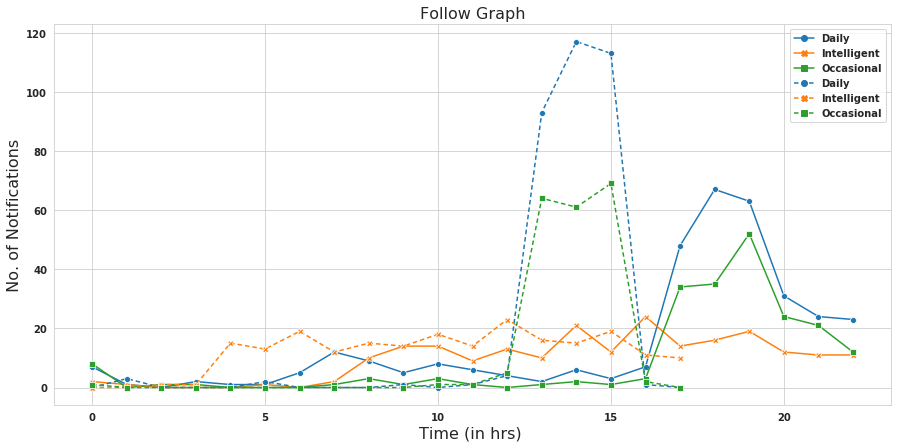

In [8]:
# number of click in different groups
fig = plt.figure(figsize = (15,7))
sns.lineplot(data = grp_f_dummy.drop(labels='f_hour',axis = 1), style = 'event', markers=True, dashes = False)
sns.lineplot(data = grp_n_dummy.drop(labels='n_hour',axis = 1), style = 'event', markers=True, dashes = [(3,2), (3,2), (3,2)])
plt.title('Follow Graph', fontsize = 16)
plt.xlabel('Time (in hrs) ', fontsize = 16)
plt.ylabel(' No. of Notifications ', fontsize = 16)

In [16]:
#fig.savefig('5_c_lineplots.jpg',dpi = 300)

# Training Machine Learning Models
With limited features set.(As provided by the Research Group).

In [17]:
df = dummy.copy(deep = True)
df.fillna(0, inplace = True)
data = pd.concat([df[df['was followed'] == 1.0],df[df['was followed'] == 0.0].sample(1500)])

days_send = pd.get_dummies(data['n_day'])
data['send_minute']=pd.to_datetime(data['send_time']).map(lambda x:x.minute)
data['viewed_minute']=pd.to_datetime( data[data['was followed']==1.0]['viewed_time']).map(lambda x:x.minute)

gender = pd.get_dummies(data['gender'],drop_first=True) # left for consideration
qual = pd.get_dummies(data['qual'])
data.drop(['trigger number', 'delay', 'n_date', 'f_date', 'send_time', 'viewed_time','e', 'n_day','f_day',
          'qual', 'gender', 'group', 'id', 'f_hour', 'viewed_minute'], axis = 1, inplace = True)
data = pd.concat([data,days_send,gender,qual], axis = 1)
data.head()

,was followed,n_hour,age,send_minute,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Male,A levels or similar,Degree,"Diploma (non degree) e.g. HNC, HND",GCSEs / O levels or similar,No formal educational qualifications,Other,Postgraduate degree
0,1.0,12,48.0,19,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1.0,18,48.0,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1.0,20,42.0,16,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
5,1.0,19,42.0,56,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
6,1.0,19,42.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [18]:
data.columns

Index(['was followed', 'n_hour', 'age', 'send_minute', 'Fri', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed', 'Male', 'A levels or similar', 'Degree',
       'Diploma (non degree) e.g. HNC, HND', 'GCSEs / O levels or similar',
       'No formal educational qualifications', 'Other', 'Postgraduate degree'],
      dtype='object')

## Imports

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


## Helper Functions

In [20]:
def skfold(X, y, model):
    skf = StratifiedKFold(n_splits=10)
    skf.get_n_splits(X, y)
    results = cross_val_score(model, X, y, cv=skf)
    return results

def print_acc(results,model):
    print("Accuracy of {} is {} and std is {}" .format(model ,results.mean()*100, results.std()*100))

In [21]:
X = data.drop(columns=['was followed'])
y = data['was followed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state = 101)

In [22]:
X_train.head()


,n_hour,age,send_minute,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Male,A levels or similar,Degree,"Diploma (non degree) e.g. HNC, HND",GCSEs / O levels or similar,No formal educational qualifications,Other,Postgraduate degree
4934,19,48.0,24,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5322,19,40.0,37,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5421,20,45.0,43,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
3242,11,39.0,18,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2671,20,43.0,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
y_test.value_counts()

0.0    492
1.0    262
Name: was followed, dtype: int64

In [24]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.72      0.73      0.72       492
         1.0       0.48      0.47      0.47       262

   micro avg       0.64      0.64      0.64       754
   macro avg       0.60      0.60      0.60       754
weighted avg       0.64      0.64      0.64       754



## K-Fold Cross-Validation

In [26]:
xgb_s = skfold(X, y, xgboost.XGBClassifier());
gnb_s = skfold(X, y, GaussianNB());
rf_s = skfold(X, y,RandomForestClassifier());
svc_s = skfold(X, y,SVC());
ada_s = skfold(X, y,AdaBoostClassifier());
knn_s = skfold(X, y,KNeighborsClassifier());
MLPc_s = skfold(X, y,MLPClassifier());
dic_s = {'XGB':xgb_s, 'RandomForest':rf_s,'SVC':svc_s,'GaussianNB':gnb_s,'adaBoost':ada_s,'KNN':knn_s, 'MLPc':MLPc_s}
dic_s

F:\TBINSTALLS\conda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\TBINSTALLS\conda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\TBINSTALLS\conda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\TBINSTALLS\conda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\TBINSTALLS\conda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default

{'XGB': array([0.58951965, 0.57641921, 0.75      , 0.75877193, 0.59210526,
        0.59649123, 0.57894737, 0.64473684, 0.56140351, 0.62280702]),
 'RandomForest': array([0.60262009, 0.58951965, 0.67105263, 0.68421053, 0.5877193 ,
        0.60964912, 0.58333333, 0.56140351, 0.55701754, 0.56140351]),
 'SVC': array([0.6069869 , 0.58951965, 0.66666667, 0.67982456, 0.54824561,
        0.5877193 , 0.59210526, 0.64912281, 0.60526316, 0.67105263]),
 'GaussianNB': array([0.52838428, 0.60262009, 0.62719298, 0.50438596, 0.55263158,
        0.58333333, 0.56578947, 0.50877193, 0.45614035, 0.4254386 ]),
 'adaBoost': array([0.58078603, 0.56768559, 0.72807018, 0.66666667, 0.59210526,
        0.5877193 , 0.61403509, 0.69298246, 0.60087719, 0.5877193 ]),
 'KNN': array([0.62008734, 0.56331878, 0.6622807 , 0.64035088, 0.52192982,
        0.58333333, 0.55701754, 0.65350877, 0.53947368, 0.61403509]),
 'MLPc': array([0.58078603, 0.62008734, 0.62280702, 0.57017544, 0.60087719,
        0.66666667, 0.62719298, 0

In [27]:
print_acc(xgb_s, 'XGBOOST')
print_acc(rf_s, 'Random Forest')
print_acc(svc_s, 'SVC ')
print_acc(gnb_s, 'gnb ')
print_acc(ada_s, 'adab ')
print_acc(knn_s, 'knn ')
print_acc(MLPc_s, 'mlp ')

print('\n\n\n')
results_s = pd.DataFrame(dic_s).applymap(lambda x: x*100)

Accuracy of XGBOOST is 62.71202022523558 and std is 6.74895910957468
Accuracy of Random Forest is 60.07929211675476 and std is 4.195101110502086
Accuracy of SVC  is 61.965065502183414 and std is 4.18263834610753
Accuracy of gnb  is 53.54688577338542 and std is 6.046175923087964
Accuracy of adab  is 62.18647054317016 and std is 5.165908168433521
Accuracy of knn  is 59.55335938098521 and std is 4.690461950154011
Accuracy of mlp  is 61.52627748410326 and std is 2.600655166188612






Text(0, 0.5, '%accuracy')

F:\TBINSTALLS\conda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
F:\TBINSTALLS\conda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


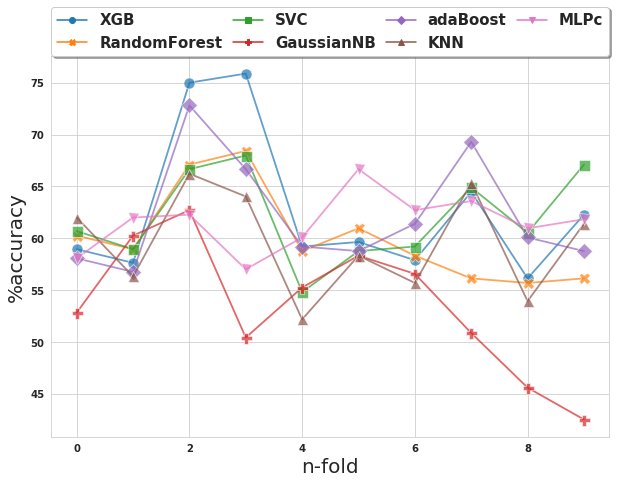

In [28]:
fig=plt.figure(figsize = (10,7))
sns.lineplot(data = results_s, style = 'event', markers=True, dashes = False,**{'linewidth':1.8, 'alpha':.7,'markersize' :11});
plt.legend(bbox_to_anchor=(0,1,1,0.2), loc="lower left",mode = 'expand', borderaxespad=0, ncol=4,fontsize = 15,shadow = True)
plt.xlabel('n-fold',fontsize = 20)
plt.ylabel('%accuracy',fontsize = 20)

In [29]:
#fig.savefig('Cross_val.jpg',dpi = 300)

![Location Clusters](images/cluster_l.jpg "Locations")

## *--*
